In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import Text2Tags as tt
import matplotlib.pyplot as plt

# In this notebook
I need to:
1. Start writting paper // Create plots for paper
1. Find least agreed upon sources and consider what theyre tags would be
1. Confussion matrix of CV predictions?

# Load in Experiment Results

In [2]:
folder = "data"
overview = pd.read_csv(f"./{folder}/results_overviews.csv", index_col=0)
#overview = overview[overview["expert_threshold"]==0.4]
overview = overview.sort_values("weighted_f1", ascending=False, ignore_index=True)
overview

,lemmatization,similarity_threshold,expert_threshold,tag_count,weighted_f1,macro_f1
0,lemmatization,0.95,0.8,244,0.370027,0.455696
1,no_lemmatization,0.65,0.8,168,0.370027,0.455696
2,lemmatization,0.70,0.8,168,0.370027,0.455696
3,no_lemmatization,0.60,0.8,150,0.369279,0.463415
4,lemmatization,0.90,0.8,239,0.363045,0.450000
...,...,...,...,...,...,...
83,lemmatization,0.90,0.4,239,0.163046,0.241692
84,lemmatization,0.80,0.4,213,0.162304,0.240964
85,lemmatization,0.95,0.4,244,0.159138,0.242424
86,lemmatization,1.00,0.4,247,0.156875,0.237082


In [3]:
overview = overview.sort_values("weighted_f1", ascending=False, ignore_index=True)
overview

,lemmatization,similarity_threshold,expert_threshold,tag_count,weighted_f1,macro_f1
0,lemmatization,0.95,0.8,244,0.370027,0.455696
1,lemmatization,0.70,0.8,168,0.370027,0.455696
2,no_lemmatization,0.65,0.8,168,0.370027,0.455696
3,no_lemmatization,0.60,0.8,150,0.369279,0.463415
4,lemmatization,0.90,0.8,239,0.363045,0.450000
...,...,...,...,...,...,...
83,lemmatization,0.90,0.4,239,0.163046,0.241692
84,lemmatization,0.80,0.4,213,0.162304,0.240964
85,lemmatization,0.95,0.4,244,0.159138,0.242424
86,lemmatization,1.00,0.4,247,0.156875,0.237082


In [4]:
# Select the parameters required to load in the correct data file
selected_expert_threshold = 0.6
data_selection = overview[overview["expert_threshold"]==selected_expert_threshold].iloc[0,:3].to_dict()
data_selection["folder"] = folder

In [5]:
data_path = "./{folder}/{lemmatization}/importances_{similarity_threshold:.2f}_{expert_threshold:.1f}.csv"
df = pd.read_csv(data_path.format(**data_selection), index_col=0)
df.head()

,annotations,count,importance_1-sided,importance_Bent tail,importance_C-shaped,importance_Classical double,importance_Compact Symmetric Object (CSO),importance_Core-dominant,importance_Core-jet,importance_Diffuse,...,shap_Narrow-angle tail (NAT),shap_Odd Radio Circle (ORC),shap_S-shaped,shap_Single,shap_Star Forming Galaxy (SFG),shap_Triple,shap_Wide-angle tail (WAT),shap_X-shaped,shap_mean,shap_weighted
0,(,1,0.000025,0.000153,0.000000,0.000021,0.0,0.000664,4.635002e-05,0.000328,...,0.000000,0.0,0.025543,0.0,0.003157,0.030025,0.000163,0.000000,0.128897,12.030513
1,),1,0.000000,0.000000,0.000209,0.000424,0.0,0.000007,2.775566e-07,0.000035,...,0.000000,0.0,0.021038,0.0,0.003193,0.714749,0.000000,0.000000,0.795036,67.022959
2,align,3,0.000012,0.000019,0.000000,0.000269,0.0,0.000000,5.815186e-06,0.001551,...,0.000814,0.0,0.000000,0.0,2.081753,0.006119,0.000000,0.000066,2.170930,392.629366
3,ambiguous,14,0.001509,0.000922,0.000906,0.013321,0.0,0.002258,2.721549e-03,0.001508,...,0.026260,0.0,0.088135,0.0,0.179508,0.816453,0.061911,0.014609,3.612460,389.057169
4,amorphous,48,0.004476,0.002921,0.003585,0.001750,0.0,0.005742,9.033082e-03,0.016276,...,0.137612,0.0,0.393276,0.0,2.733023,0.612928,0.605333,0.433068,9.447280,1144.627265


In [6]:
# Consider only the large scale importances (not classwise).
#df = df[["annotations", "count", "importance_mean", "importance_weighted", "shap_mean", "shap_weighted"]]
sorting_regime = ["shap_weighted", "shap_mean", "importance_weighted", "importance_mean"]
for regime in sorting_regime[::-1]:
    df.sort_values(regime, ascending=False, ignore_index=True, inplace=True)
    df = df.rename_axis(f"{regime}_ranking").reset_index()
df.head(30)

,shap_weighted_ranking,shap_mean_ranking,importance_weighted_ranking,importance_mean_ranking,annotations,count,importance_1-sided,importance_Bent tail,importance_C-shaped,importance_Classical double,...,shap_Narrow-angle tail (NAT),shap_Odd Radio Circle (ORC),shap_S-shaped,shap_Single,shap_Star Forming Galaxy (SFG),shap_Triple,shap_Wide-angle tail (WAT),shap_X-shaped,shap_mean,shap_weighted
0,0,0,0,22,trace,35,0.001078,0.000683,0.000715,0.001406,...,0.103464,0.0,0.138184,0.0,38.253378,0.297733,0.316325,0.067752,43.104780,7578.225930
1,1,1,5,29,disk,30,0.000637,0.001531,0.000164,0.001846,...,0.082033,0.0,0.125417,0.0,29.165998,0.192129,0.178466,0.035167,32.655237,5763.115414
2,2,2,9,8,bright,146,0.016230,0.023849,0.011603,0.016560,...,1.186044,0.0,0.500631,0.0,6.482696,1.503515,1.768107,0.452713,31.979997,3937.784844
3,3,7,13,16,double,74,0.007675,0.018142,0.009439,0.034210,...,0.230640,0.0,0.858336,0.0,3.679085,0.808871,0.499491,0.117646,25.957217,3792.017501
4,4,14,21,48,spiral,24,0.000652,0.000694,0.000397,0.000994,...,0.044060,0.0,0.051030,0.0,17.336408,0.096949,0.098160,0.027748,18.905751,3337.573559
5,5,5,1,1,asymmetric,71,0.041867,0.050592,0.021790,0.021910,...,0.477264,0.0,1.029622,0.0,6.153695,0.630741,0.646422,0.427218,26.319988,3161.111884
6,6,4,2,4,extend,153,0.032613,0.022649,0.017833,0.020599,...,0.693369,0.0,1.734050,0.0,2.863731,2.209518,1.345417,0.319711,26.916753,3048.516569
7,7,12,16,26,hourglass,23,0.016680,0.000801,0.000580,0.036658,...,0.037425,0.0,0.116007,0.0,0.195271,0.505641,0.673897,0.040443,19.550044,3000.833025
8,8,9,20,18,compact,122,0.008130,0.017371,0.033883,0.006825,...,0.436320,0.0,0.800120,0.0,2.616907,0.851845,1.535345,0.869721,21.985414,2758.384309
9,9,11,8,7,counterpart,81,0.014245,0.022427,0.029722,0.014085,...,1.003151,0.0,0.752317,0.0,1.536291,1.116213,1.079478,0.196040,21.485025,2660.070783


# Plot Planning
1. Model selection plot as pair plot
1. Importance plots similar to those in previous notebooks?
1. Tag frequency bar plot
1. Correlation matrix plot: see v7
1. Clustering box plot structure thing.


In [7]:
sns.set_theme(style="white")
overview.head()

,lemmatization,similarity_threshold,expert_threshold,tag_count,weighted_f1,macro_f1
0,lemmatization,0.95,0.8,244,0.370027,0.455696
1,lemmatization,0.70,0.8,168,0.370027,0.455696
2,no_lemmatization,0.65,0.8,168,0.370027,0.455696
3,no_lemmatization,0.60,0.8,150,0.369279,0.463415
4,lemmatization,0.90,0.8,239,0.363045,0.450000


## Model Selection / Structure in Large Scale Data

Pairplot:
- Pairplot shows significant structure in `expert_threshold` because the problem itself is easier (but not necessarily better) when threshold is higher.
- `tag_count` and `similarity_threshold` are strongly correlated as the lower the similarity threshold, the fewer unique tags are expected to be present.

The second plot highlights the difference in lemmatization on the f1 scores of the models.

In [8]:
# Pair plot
overview = pd.read_csv("./data/results_overviews.csv", index_col=0).sort_values(by="weighted_f1", ascending=False, ignore_index=True)
overview

,lemmatization,similarity_threshold,expert_threshold,tag_count,weighted_f1,macro_f1
0,lemmatization,0.95,0.8,244,0.370027,0.455696
1,no_lemmatization,0.65,0.8,168,0.370027,0.455696
2,lemmatization,0.70,0.8,168,0.370027,0.455696
3,no_lemmatization,0.60,0.8,150,0.369279,0.463415
4,lemmatization,0.90,0.8,239,0.363045,0.450000
...,...,...,...,...,...,...
83,lemmatization,0.90,0.4,239,0.163046,0.241692
84,lemmatization,0.80,0.4,213,0.162304,0.240964
85,lemmatization,0.95,0.4,244,0.159138,0.242424
86,lemmatization,1.00,0.4,247,0.156875,0.237082


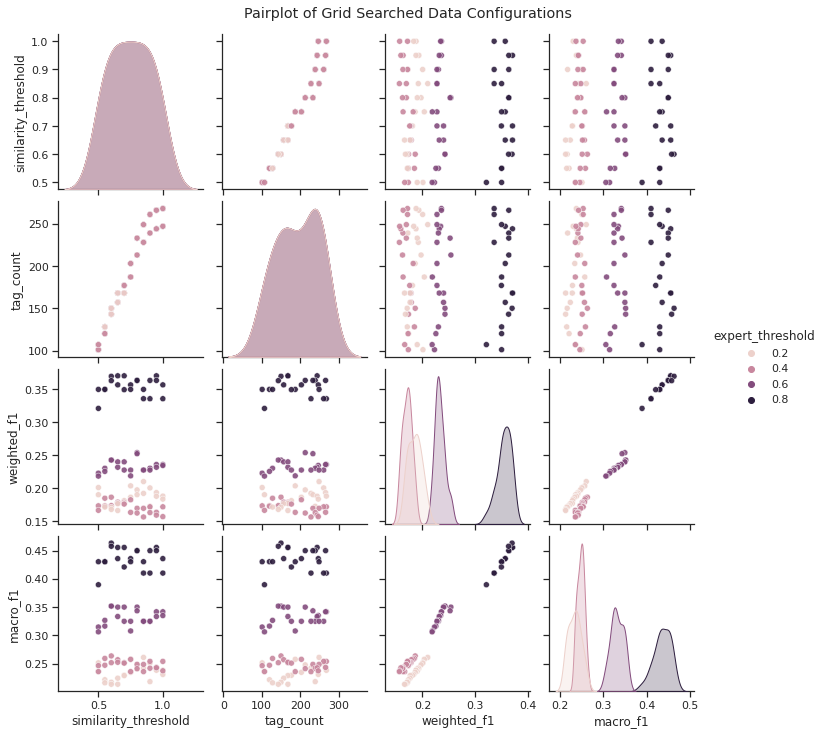

In [9]:
sns.set_theme(style="ticks")
g = sns.pairplot(
    overview,
    hue="expert_threshold",
    plot_kws={'alpha':0.9}
)
g.fig.suptitle("Pairplot of Grid Searched Data Configurations", y=1.02)
plt.show()

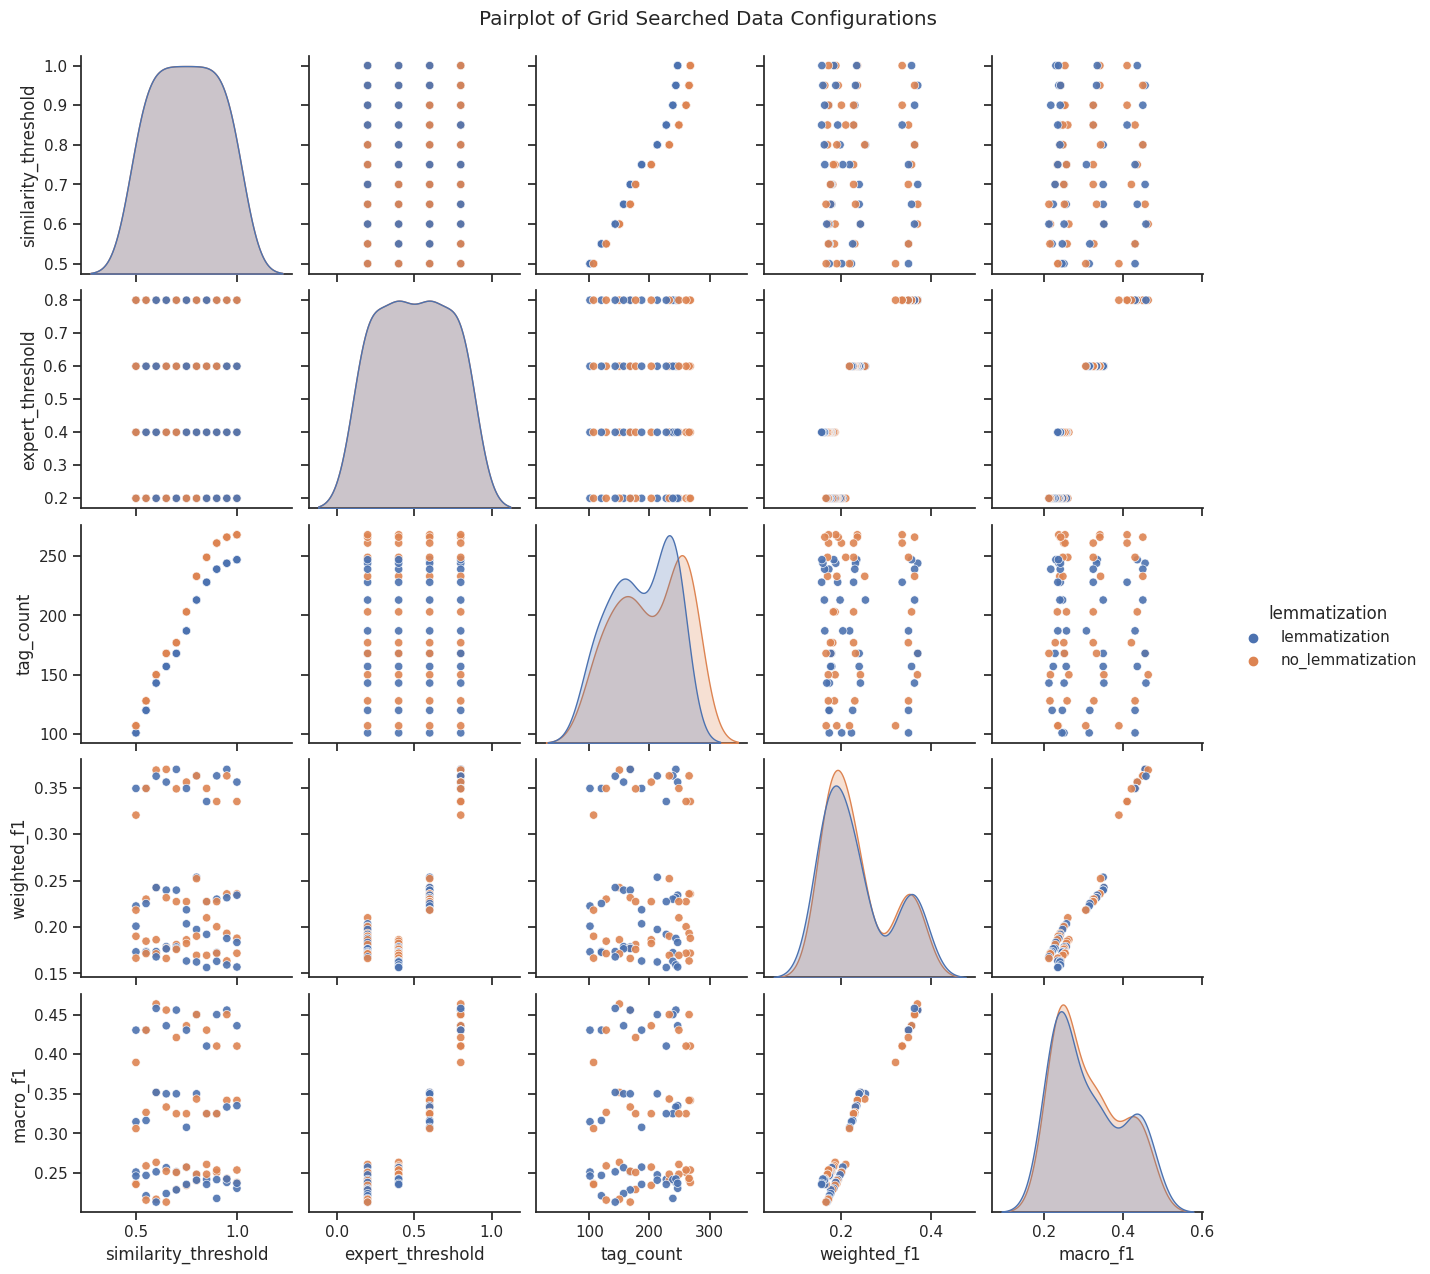

In [10]:
sns.set_theme(style="ticks")
g = sns.pairplot(
    overview,
    #hue="expert_threshold",
    hue="lemmatization",
    plot_kws={'alpha':0.9}
)
g.fig.suptitle("Pairplot of Grid Searched Data Configurations", y=1.02)
plt.show()

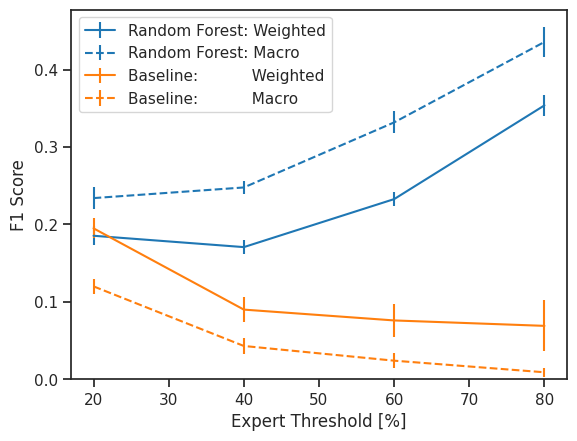

In [11]:
# Plot of Simulated Results vs Real mean & Std
# Dotted and full are weighted and macro
tmp = overview.copy()
mean = tmp.groupby("expert_threshold").mean()[["weighted_f1", "macro_f1"]].reset_index()
std = tmp.groupby("expert_threshold").std()[["weighted_f1", "macro_f1"]].reset_index()
tmp = mean.join(std, rsuffix="_std")
tmp

baseline = { # From random_guessing_estimating.ipynb
    "Expert Threshold": [0.2, 0.4, 0.6, 0.8],
    "macro_mean":    [0.120, 0.043, 0.024, 0.009],
    "macro_std":     [0.010, 0.010, 0.010, 0.006],
    "weighted_mean": [0.195, 0.090, 0.076, 0.069],
    "weighted_std":  [0.013, 0.016, 0.021, 0.033]
}
baseline = pd.DataFrame(baseline)

plt.errorbar(
    x = tmp.expert_threshold*100,
    y = tmp.weighted_f1,
    yerr = tmp.weighted_f1_std,
    label='Random Forest: Weighted',
    color="tab:blue"
)
plt.errorbar(
    x = tmp.expert_threshold*100,
    y = tmp.macro_f1,
    yerr = tmp.macro_f1_std,
    label='Random Forest: Macro',
    color="tab:blue",
    linestyle="--"
)
plt.errorbar(
    x = baseline["Expert Threshold"]*100,
    y = baseline.weighted_mean,
    yerr = baseline.weighted_std,
    label='Baseline:           Weighted',
    color="tab:orange"
)
plt.errorbar(
    x = baseline["Expert Threshold"]*100,
    y = baseline.macro_mean,
    yerr = baseline.macro_std,
    label='Baseline:           Macro',
    color="tab:orange",
    linestyle="--"
)
plt.ylim(0,None)
plt.xlabel("Expert Threshold [%]")
plt.ylabel("F1 Score")
plt.legend(loc="upper left")
plt.show()

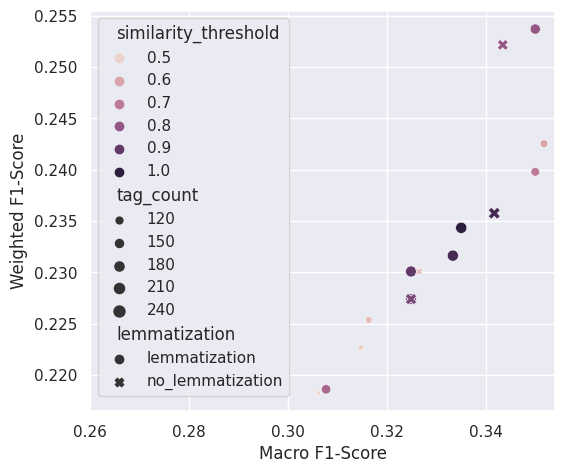

In [12]:
sns.set(rc={'figure.figsize':(6,5.2)})
g = sns.scatterplot(
    data=overview[overview["expert_threshold"]==selected_expert_threshold],
    x="macro_f1",
    y="weighted_f1",
    hue="similarity_threshold",
    style="lemmatization",
    size="tag_count"
)
g.set(
    xlim=(0.26,None),
    ylim=(None,None),
    #title="Similarity Threshold Evaluation",
    xlabel="Macro F1-Score",
    ylabel="Weighted F1-Score"
)

plt.show()
# From this plot, the best one is: No lemmatization, 0.8 similarity threshold, 40% expert threshold

In [13]:
overview[overview["expert_threshold"]==selected_expert_threshold]

,lemmatization,similarity_threshold,expert_threshold,tag_count,weighted_f1,macro_f1
22,lemmatization,0.80,0.6,213,0.253703,0.350000
23,no_lemmatization,0.80,0.6,233,0.252160,0.343434
24,no_lemmatization,0.60,0.6,150,0.242531,0.351759
25,lemmatization,0.60,0.6,143,0.242531,0.351759
26,lemmatization,0.65,0.6,157,0.239788,0.350000
27,lemmatization,0.70,0.6,168,0.239788,0.350000
28,no_lemmatization,1.00,0.6,268,0.235754,0.341709
29,no_lemmatization,0.95,0.6,266,0.235754,0.341709
30,lemmatization,1.00,0.6,247,0.234332,0.335025
31,no_lemmatization,0.65,0.6,168,0.231622,0.333333


In [14]:
save_best_name = data_path.format(**data_selection).split("/")[-1]
df.to_csv(f"./data/best_{save_best_name}")
print(f"Saving: best_{save_best_name}")
df

Saving: best_importances_0.80_0.6.csv


,shap_weighted_ranking,shap_mean_ranking,importance_weighted_ranking,importance_mean_ranking,annotations,count,importance_1-sided,importance_Bent tail,importance_C-shaped,importance_Classical double,...,shap_Narrow-angle tail (NAT),shap_Odd Radio Circle (ORC),shap_S-shaped,shap_Single,shap_Star Forming Galaxy (SFG),shap_Triple,shap_Wide-angle tail (WAT),shap_X-shaped,shap_mean,shap_weighted
0,0,0,0,22,trace,35,0.001078,0.000683,7.145573e-04,1.405503e-03,...,0.103464,0.0,0.138184,0.0,38.253378,0.297733,0.316325,0.067752,43.104780,7578.225930
1,1,1,5,29,disk,30,0.000637,0.001531,1.638580e-04,1.845937e-03,...,0.082033,0.0,0.125417,0.0,29.165998,0.192129,0.178466,0.035167,32.655237,5763.115414
2,2,2,9,8,bright,146,0.016230,0.023849,1.160290e-02,1.655950e-02,...,1.186044,0.0,0.500631,0.0,6.482696,1.503515,1.768107,0.452713,31.979997,3937.784844
3,3,7,13,16,double,74,0.007675,0.018142,9.439292e-03,3.420994e-02,...,0.230640,0.0,0.858336,0.0,3.679085,0.808871,0.499491,0.117646,25.957217,3792.017501
4,4,14,21,48,spiral,24,0.000652,0.000694,3.965688e-04,9.935260e-04,...,0.044060,0.0,0.051030,0.0,17.336408,0.096949,0.098160,0.027748,18.905751,3337.573559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,208,208,208,209,upwards,1,0.000012,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.000000,0.0,0.001918,0.000000,0.000000,0.000115,0.026156,4.586500
209,209,210,212,212,quasar,1,0.000000,0.000000,1.642943e-07,4.184310e-07,...,0.000093,0.0,0.000000,0.0,0.003433,0.000000,0.000000,0.000000,0.017498,3.211367
210,210,211,211,211,ecliptic,1,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.0,0.000000,0.0,0.004004,0.000000,0.000000,0.000000,0.015702,2.912075
211,211,209,210,208,clear,1,0.000000,0.000000,0.000000e+00,1.944936e-06,...,0.000000,0.0,0.000000,0.0,0.010254,0.000000,0.000000,0.000000,0.022640,2.885111


## Importance plotting


In [15]:
importance_selection = "shap_weighted"
cumulative = np.cumsum(df[importance_selection])
cumulative /= cumulative.max()
threshold  = 0.68

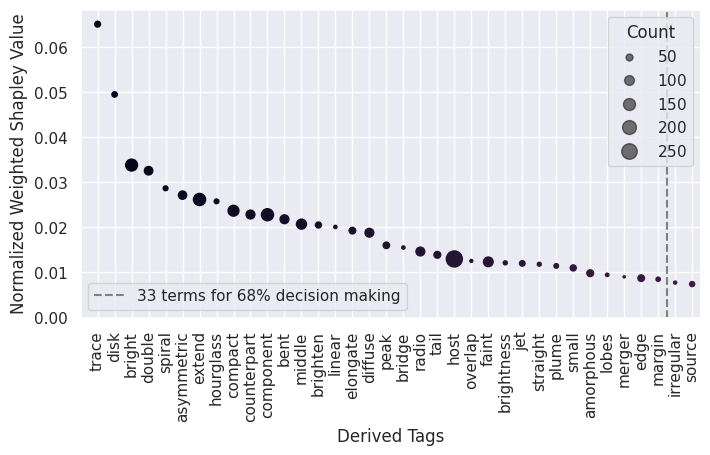

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
scatter = ax.scatter(
    np.arange(df[importance_selection+"_ranking"].shape[0]), 
    df[importance_selection]/df[importance_selection].sum(),
    s=0.5*df["count"].to_numpy(),
    c=np.linspace(0,1,df.annotations.shape[0])
)

kw = dict(prop="sizes", num=6, func=lambda s: 2*s, alpha=0.6)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="upper right", title="Count")

ax.add_artist(legend2)

ax.set_xticks(np.arange(df[importance_selection].shape[0]), df.annotations, rotation=90)
ax.axvline(np.where(cumulative>threshold)[0][0]+0.5, linestyle='--', c='gray', label=f"{np.where(cumulative>threshold)[0][0]} terms for {threshold*100:.0f}% decision making")
#ax.axvline(10.5, linestyle='dashdot', c='black', label=f"Top 10")
#ax.set_title(f"Normalized Shapley Values of Derived Tags for Science Classifications")
ax.set_xlabel(f"Derived Tags")
ax.set_ylabel(f"Normalized Weighted Shapley Value")
ax.set_ylim(0, None)
ax.legend(framealpha=1, fontsize=8)
ax.set_xlim(-1, 35.5)
ax.legend()
plt.show()

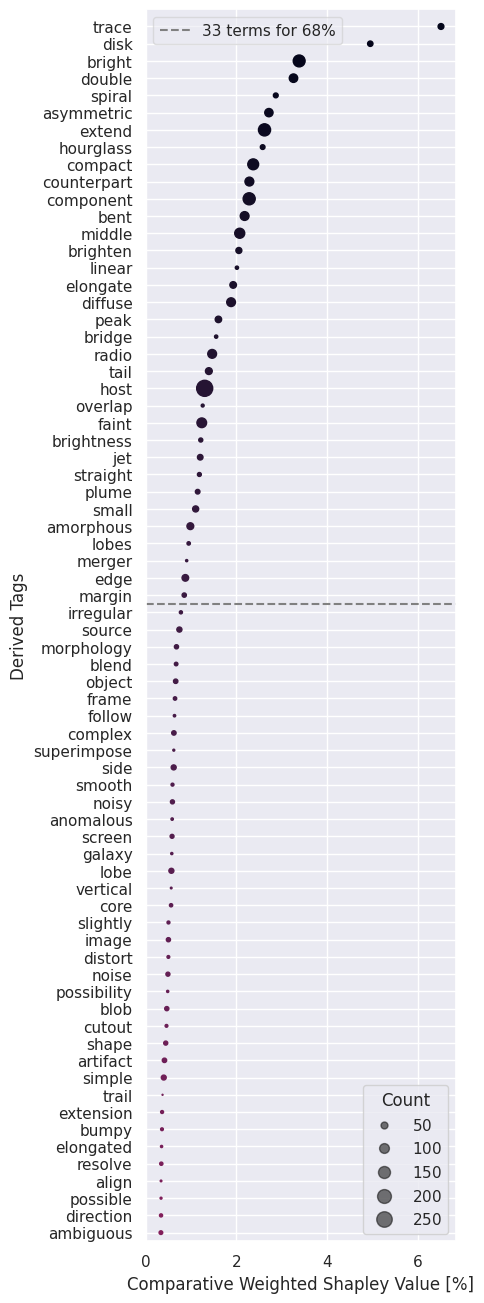

In [17]:
fig, ax = plt.subplots(figsize=(4,16))
scatter = ax.scatter(
    df[importance_selection]/df[importance_selection].sum()*100,
    np.arange(df[importance_selection+"_ranking"].shape[0]), 
    s=0.5*df["count"].to_numpy(),
    c=np.linspace(0,1,df.annotations.shape[0])
)
#plt.gca().invert_yaxis()

kw = dict(prop="sizes", num=6, func=lambda s: 2*s, alpha=0.6)
legend2 = ax.legend(*scatter.legend_elements(**kw),
                    loc="lower right", title="Count")

ax.add_artist(legend2)

ax.set_yticks(np.arange(df[importance_selection].shape[0]), df.annotations, rotation=0)
ax.axhline(
    np.where(cumulative>threshold)[0][0]+0.5, 
    linestyle='--', c='gray', 
    label=f"{np.where(cumulative>threshold)[0][0]} terms for {threshold*100:.0f}%"
)
#ax.axvline(10.5, linestyle='dashdot', c='black', label=f"Top 10")
#ax.set_title(f"Normalized Shapley Values of Derived Tags for Science Classifications")
ax.set_ylabel(f"Derived Tags")
ax.set_xlabel(f"Comparative Weighted Shapley Value [%]")
ax.set_xlim(0, None)
ax.set_ylim(-1, 70.5)

plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
ax.legend(framealpha=0.6)
plt.show()


In [18]:
taxonomy = list(df.annotations[:33])
print(taxonomy)

['trace', 'disk', 'bright', 'double', 'spiral', 'asymmetric', 'extend', 'hourglass', 'compact', 'counterpart', 'component', 'bent', 'middle', 'brighten', 'linear', 'elongate', 'diffuse', 'peak', 'bridge', 'radio', 'tail', 'host', 'overlap', 'faint', 'brightness', 'jet', 'straight', 'plume', 'small', 'amorphous', 'lobes', 'merger', 'edge']


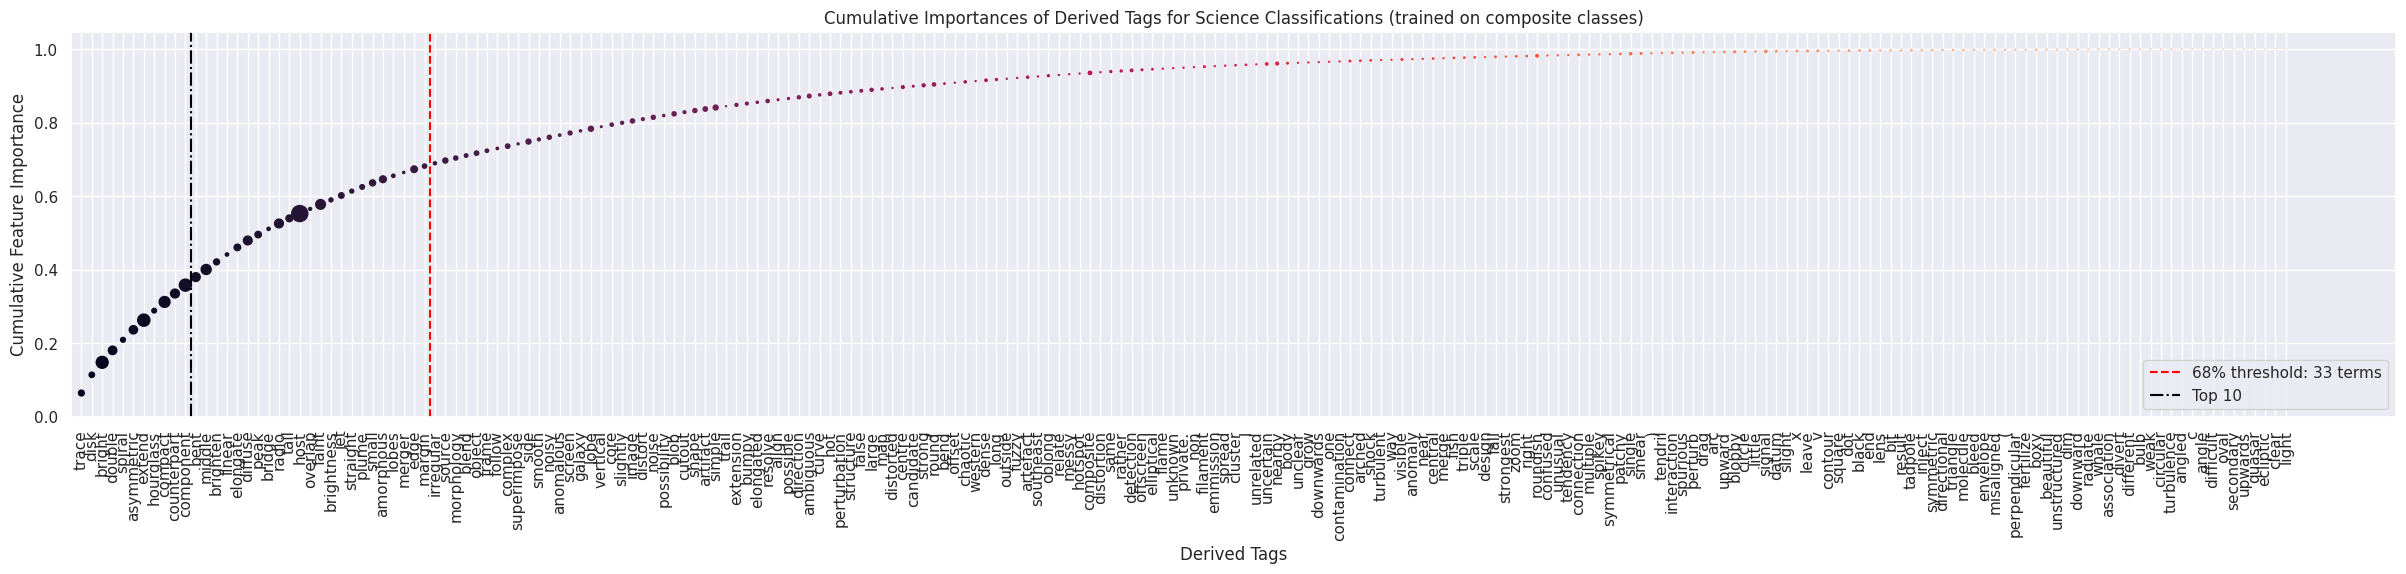

In [19]:
fig, ax = plt.subplots(figsize=(30,5))
ax.scatter(
    np.arange(df[importance_selection+"_ranking"].shape[0]), 
    cumulative,
    s=0.5*df["count"].to_numpy(),
    c=np.linspace(0,1,df.annotations.shape[0])
)
ax.set_xticks(np.arange(df[importance_selection].shape[0]), df.annotations, rotation=90)
ax.axvline(np.where(cumulative>threshold)[0][0]+0.5, linestyle='--', c='red', label=f"{threshold*100:.0f}% threshold: {np.where(cumulative>threshold)[0][0]} terms")
ax.axvline(10.5, linestyle='dashdot', c='black', label=f"Top 10")
ax.set_title(f"Cumulative Importances of Derived Tags for Science Classifications (trained on composite classes)")
ax.set_xlabel(f"Derived Tags")
ax.set_ylabel(f"Cumulative Feature Importance")
ax.set_ylim(0,None)
ax.set_xlim(-1,None)
ax.legend()
plt.show()

## Plot / Inspect Correlations


In [20]:
# Select the parameters required to load in the correct data file
data_selection

{'lemmatization': 'lemmatization',
 'similarity_threshold': 0.8,
 'expert_threshold': 0.6,
 'folder': 'data'}

In [21]:
# Format y to be usable for correlations across sample
X = pd.read_csv(f"./data/{data_selection['lemmatization']}/derived_terms_{data_selection['similarity_threshold']:.2f}.csv", index_col=0)
X = X.join(pd.get_dummies(X['most_similar'], prefix='tag')).drop(columns=["classification_id", "workflow_id", "codes", "most_similar", "annotations", "user_id"])

agg = {column : "sum" for column in X.columns}
#agg["user_id"] = "first"
agg["subject_ids"] = "first"

X = X.groupby(by="subject_ids", as_index=False).agg(agg)

X#[["subject_ids","original_annotations"]]

,subject_ids,original_annotations,tag_(,tag_),tag_1,tag_adjacent,tag_align,tag_ambiguous,tag_amorphous,tag_angle,...,tag_vertical,tag_visible,tag_w,tag_way,tag_weak,tag_western,tag_whale,tag_wide,tag_x,tag_zoom
0,71286998,there is associated emission in the middle sou...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,71286999,bright complex extended very large emission re...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,71287000,distorted tailsmulti-component diffuse complex...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71287001,diffuse extended part of larger structuredoubl...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,71287002,bright complex extended possible association w...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,71287292,there seems to be a jet stream in every direct...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
295,71287293,faint slightly extended noisyradio signal spur...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
296,71287294,compact component patchy emission aroundisolat...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,71287295,two-component elongatedlike two radio sources ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Format y to be usable for correlations across sample
y = pd.read_csv(f"./data/expert_classifications.csv", index_col=0)
y["annotations"] = y["annotations"].str.split(',')
y = y.explode("annotations")
y = y.join(pd.get_dummies(y["annotations"], prefix='sci')).drop(columns=["classification_id", "workflow_id", "annotations", "user_id"])

agg = {column : "sum" for column in y.columns}
#agg["user_id"] = "first"
agg["subject_ids"] = "first"

y = y.groupby(by="subject_ids", as_index=False).agg(agg)
y

,subject_ids,sci_1-sided,sci_Bent tail,sci_C-shaped,sci_Classical double,sci_Compact Symmetric Object (CSO),sci_Core-dominant,sci_Core-jet,sci_Diffuse,sci_Double,...,sci_Fanaroff and Riley Class 2 (FR II),sci_Hybrid,sci_Narrow-angle tail (NAT),sci_Odd Radio Circle (ORC),sci_S-shaped,sci_Single,sci_Star Forming Galaxy (SFG),sci_Triple,sci_Wide-angle tail (WAT),sci_X-shaped
0,71286998,0,0,0,0,2,0,0,2,0,...,0,0,0,0,0,7,0,0,0,0
1,71286999,0,0,4,0,0,0,0,7,0,...,0,1,0,0,0,6,0,0,4,0
2,71287000,0,11,9,0,0,9,0,0,0,...,9,9,9,0,0,0,0,9,13,0
3,71287001,0,7,7,0,0,0,0,0,2,...,7,9,0,0,0,0,0,9,0,0
4,71287002,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,71287292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
295,71287293,0,2,0,0,0,0,4,4,0,...,0,0,0,0,0,5,0,0,0,0
296,71287294,0,0,7,0,0,4,0,2,0,...,0,0,0,0,0,3,0,0,0,0
297,71287295,2,0,0,0,0,0,2,0,7,...,2,0,0,0,0,2,0,0,0,0


In [23]:
corr = y.merge(X, on="subject_ids", how="left").corr()
corr

,subject_ids,sci_1-sided,sci_Bent tail,sci_C-shaped,sci_Classical double,sci_Compact Symmetric Object (CSO),sci_Core-dominant,sci_Core-jet,sci_Diffuse,sci_Double,...,tag_vertical,tag_visible,tag_w,tag_way,tag_weak,tag_western,tag_whale,tag_wide,tag_x,tag_zoom
subject_ids,1.000000,-0.024260,0.007761,0.033366,0.073057,-0.094843,0.100423,0.070504,-0.034476,0.010561,...,0.009331,-0.026533,-0.014094,-0.033276,-0.032215,-0.069799,0.092617,0.008081,-0.032658,-0.022818
sci_1-sided,-0.024260,1.000000,0.068932,-0.048110,-0.062211,-0.069105,0.190091,0.788396,0.188375,0.164029,...,-0.045997,-0.061591,-0.026467,0.021926,-0.026467,-0.026467,-0.026467,-0.037493,-0.013599,0.041732
sci_Bent tail,0.007761,0.068932,1.000000,0.620480,0.029031,-0.074315,0.485174,0.148312,0.010281,0.201155,...,-0.036922,-0.064609,0.194495,-0.030096,-0.021245,-0.021245,-0.021245,0.020840,-0.036922,0.105733
sci_C-shaped,0.033366,-0.048110,0.620480,1.000000,-0.016395,-0.066657,0.488324,-0.003666,-0.015569,0.110114,...,-0.033117,-0.022298,0.033701,-0.026995,-0.019056,-0.019056,-0.019056,0.010373,0.028007,-0.026995
sci_Classical double,0.073057,-0.062211,0.029031,-0.016395,1.000000,-0.060293,-0.082917,0.008370,-0.142366,0.401715,...,-0.037212,-0.018088,-0.021412,-0.030332,-0.021412,0.117766,-0.021412,-0.030332,0.043414,-0.030332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tag_western,-0.069799,-0.026467,-0.021245,-0.019056,0.117766,-0.011738,-0.023186,-0.024519,-0.041049,0.058692,...,-0.005832,-0.010205,-0.003356,-0.004754,-0.003356,1.000000,-0.003356,-0.004754,-0.005832,-0.004754
tag_whale,0.092617,-0.026467,-0.021245,-0.019056,-0.021412,-0.011738,-0.023186,-0.024519,0.062380,0.034913,...,-0.005832,-0.010205,-0.003356,-0.004754,-0.003356,-0.003356,1.000000,-0.004754,-0.005832,-0.004754
tag_wide,0.008081,-0.037493,0.020840,0.010373,-0.030332,-0.016628,-0.032846,-0.034734,0.015109,-0.017913,...,-0.008261,-0.014456,-0.004754,-0.006734,-0.004754,-0.004754,-0.004754,1.000000,-0.008261,-0.006734
tag_x,-0.032658,-0.013599,-0.036922,0.028007,0.043414,-0.020399,-0.040295,-0.042612,0.028522,0.019350,...,-0.010135,-0.017735,-0.005832,-0.008261,-0.005832,-0.005832,-0.005832,-0.008261,1.000000,-0.008261


In [24]:
# Look at histogram of data
tmp = corr.copy()
tmp[(tmp==1)] = np.nan
#corr
tmp = tmp.dropna(axis=0, how='all').dropna(axis=1, how='all')
tmp.head()

,subject_ids,sci_1-sided,sci_Bent tail,sci_C-shaped,sci_Classical double,sci_Compact Symmetric Object (CSO),sci_Core-dominant,sci_Core-jet,sci_Diffuse,sci_Double,...,tag_vertical,tag_visible,tag_w,tag_way,tag_weak,tag_western,tag_whale,tag_wide,tag_x,tag_zoom
subject_ids,NaN,-0.024260,0.007761,0.033366,0.073057,-0.094843,0.100423,0.070504,-0.034476,0.010561,...,0.009331,-0.026533,-0.014094,-0.033276,-0.032215,-0.069799,0.092617,0.008081,-0.032658,-0.022818
sci_1-sided,-0.024260,NaN,0.068932,-0.048110,-0.062211,-0.069105,0.190091,0.788396,0.188375,0.164029,...,-0.045997,-0.061591,-0.026467,0.021926,-0.026467,-0.026467,-0.026467,-0.037493,-0.013599,0.041732
sci_Bent tail,0.007761,0.068932,NaN,0.620480,0.029031,-0.074315,0.485174,0.148312,0.010281,0.201155,...,-0.036922,-0.064609,0.194495,-0.030096,-0.021245,-0.021245,-0.021245,0.020840,-0.036922,0.105733
sci_C-shaped,0.033366,-0.048110,0.620480,NaN,-0.016395,-0.066657,0.488324,-0.003666,-0.015569,0.110114,...,-0.033117,-0.022298,0.033701,-0.026995,-0.019056,-0.019056,-0.019056,0.010373,0.028007,-0.026995
sci_Classical double,0.073057,-0.062211,0.029031,-0.016395,NaN,-0.060293,-0.082917,0.008370,-0.142366,0.401715,...,-0.037212,-0.018088,-0.021412,-0.030332,-0.021412,0.117766,-0.021412,-0.030332,0.043414,-0.030332


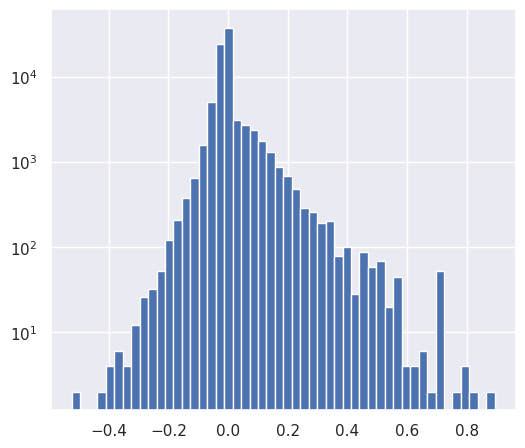

In [25]:
plt.hist(tmp.to_numpy().flatten(), bins=50)
plt.yscale('log')
plt.show()

In [26]:
# Remove everything which is corr < 0.3
tmp = corr.copy()
tmp[(np.abs(tmp.to_numpy())<0.3) | (tmp.to_numpy()==1)] = np.nan
#corr
tmp = tmp.dropna(axis=0, how='all').dropna(axis=1, how='all')
tmp.head()

,sci_1-sided,sci_Bent tail,sci_C-shaped,sci_Classical double,sci_Compact Symmetric Object (CSO),sci_Core-dominant,sci_Core-jet,sci_Diffuse,sci_Double,sci_Double-double (DDRG),...,tag_v,tag_vertical,tag_visible,tag_w,tag_weak,tag_western,tag_whale,tag_wide,tag_x,tag_zoom
sci_1-sided,NaN,NaN,NaN,NaN,NaN,NaN,0.788396,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sci_Bent tail,NaN,NaN,0.62048,NaN,NaN,0.485174,NaN,NaN,NaN,0.372305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sci_C-shaped,NaN,0.62048,NaN,NaN,NaN,0.488324,NaN,NaN,NaN,0.347590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sci_Classical double,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.401715,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sci_Compact Symmetric Object (CSO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


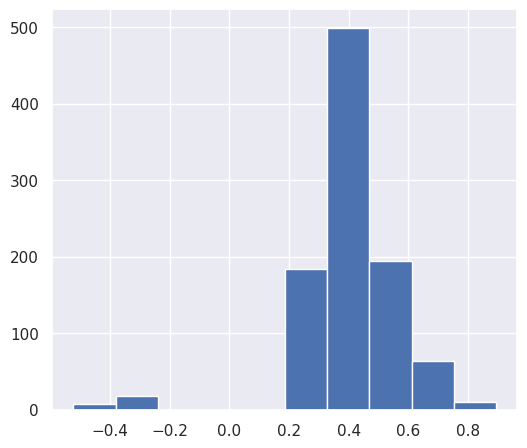

In [27]:
plt.hist(tmp.to_numpy().flatten())
plt.show()

In [28]:
import networkx as nx
import pylab
from pyvis.network import Network
data = tmp.fillna(0).to_numpy()
G = nx.from_numpy_matrix(data, create_using=nx.Graph)
mapping = {idx: column for idx, column in enumerate(tmp.columns)}
reverse_mapping = {v: k for k,v in mapping.items()}

cm = pylab.get_cmap('viridis')


for i, j in G.edges:
    G.edges[i, j]["value"] = 100*data[i, j]**2
    G.edges[i, j]["color"] = ["#255280", "#99632c"][0 if data[i,j]>0 else 1]
for i in G.nodes:
    try:
        G.nodes[i]["value"] = 1.1**(190-int(df[df["annotations"]==mapping[i][4:]]["shap_weighted_ranking"].values[0]))
    except:
        pass
    if mapping[i][:3]=="sci":
        G.nodes[i]["color"] = "#ffa44a"
    elif mapping[i][4:] in taxonomy:
        G.nodes[i]["color"] = "#834aff"
    else:
        G.nodes[i]["color"] = "#4aa7ff"

In [29]:
mapping = {k: v[4:] for k, v in mapping.items()}
G = nx.relabel_nodes(G, mapping)

In [30]:
### THIS WORKS, BUT TAKES A LOT OF COMPUTE TO RUN (DUE TO PHYSICS SIMULATION RUNNING I THINK)
## TODO: Add slight color highlight for those tags which were chosen as final taxonomy? Top N (30?)?
net = Network(notebook=True, width='100%', height="1000px", bgcolor="#f2ece6", font_color="black")
net.from_nx(G)
#net.show("tmp.html")

NOTE: Any entry below which is white is shown in the graph visualisation above.

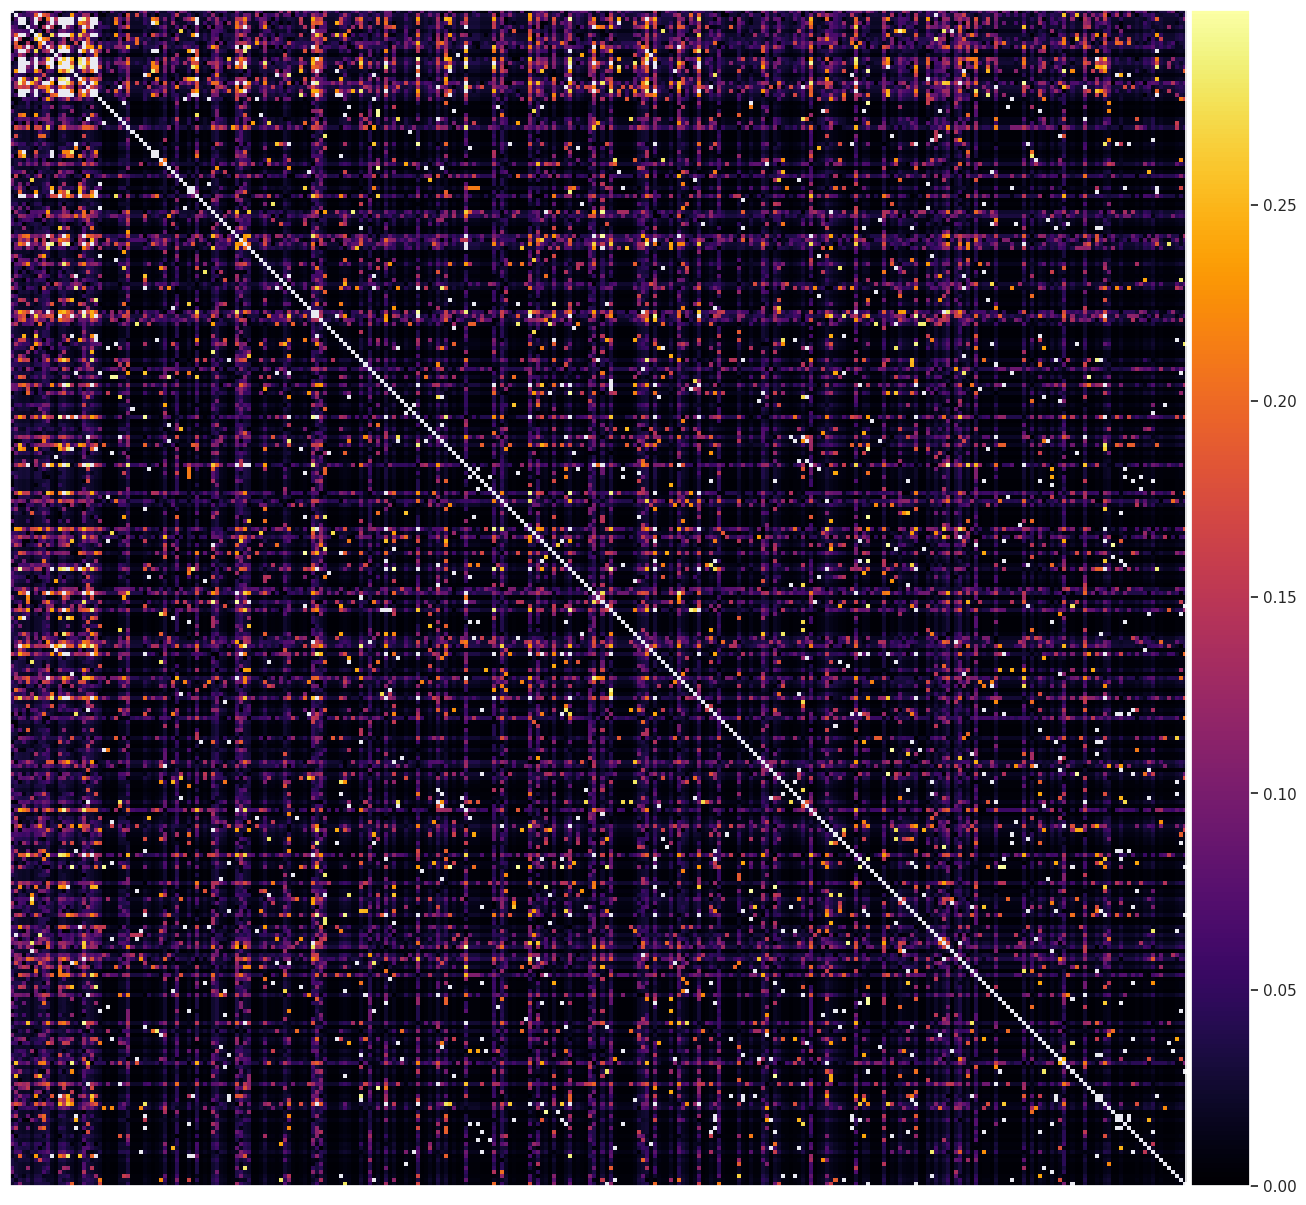

In [31]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
lim = [None, None]
scale = lambda x: np.abs(x)
fig, ax = plt.subplots(1,1, figsize=(16,16))
im = ax.imshow(scale(corr[np.abs(corr)<0.3]), vmin=lim[0], vmax=lim[1], cmap="inferno")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#ax.set_yticks(np.arange(corr.shape[1]), corr.columns, rotation=0)
#ax.set_xticks(np.arange(corr.shape[1]), corr.columns, rotation=90)
ax.set(
    xticks=[],
    yticks=[]
)
plt.show()


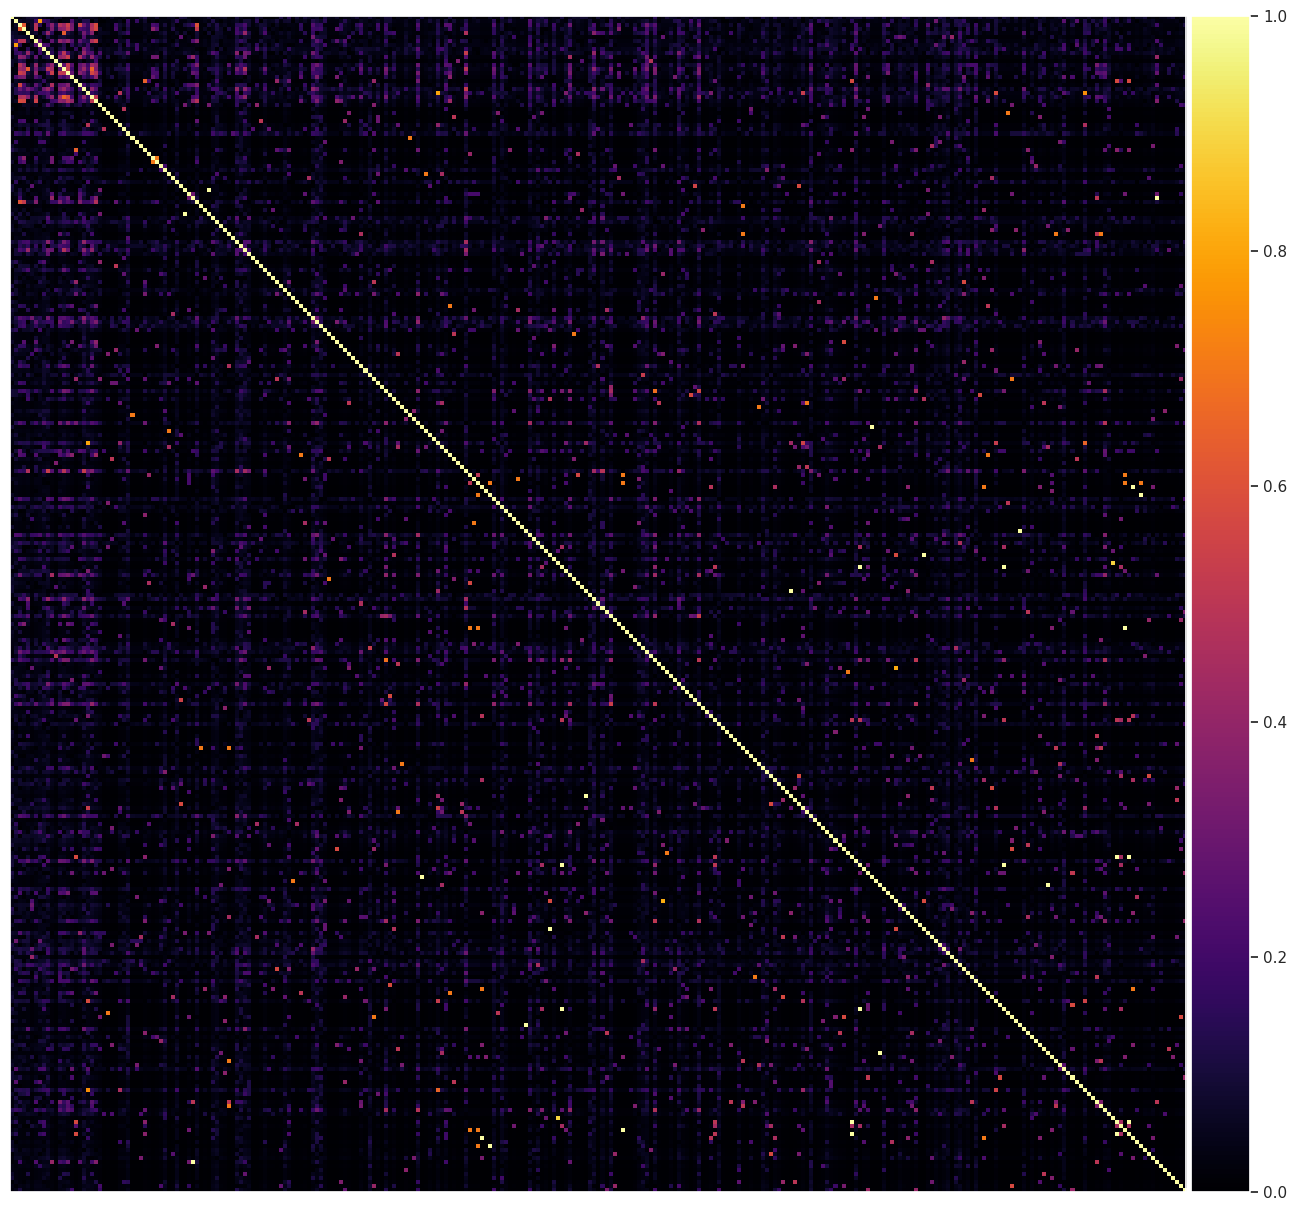

In [32]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
lim = [None, None]
scale = lambda x: np.abs(x)
fig, ax = plt.subplots(1,1, figsize=(16,16))
im = ax.imshow(scale(corr), vmin=lim[0], vmax=lim[1], cmap="inferno")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
#ax.set_yticks(np.arange(corr.shape[1]), corr.columns, rotation=0)
#ax.set_xticks(np.arange(corr.shape[1]), corr.columns, rotation=90)
ax.set(
    xticks=[],
    yticks=[]
)
plt.show()

# Similarities Histogram
Use early data to Produce Paper Ready Similarities Histogram In Correct Style

In [43]:
from Text2Tags.embedding import Annotations
embedding.Annotations
df = pd.read_csv("./data/english_annotations_cleaned.csv", index_col=0).dropna()
enc = Annotations(df, lemmatize=True)


/home/mbowles/Documents/language/Text2Tag/Text2Tags/embedding.py:33: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  lambda x: [doc.similarity(x) for doc in df['doc']]


In [47]:
values = enc.df['similarities'].values
values = np.vstack(values)
print(values.shape)
self_similarities = np.identity(values.shape[0]).flatten()
values = values.flatten()
values = np.where(self_similarities==0, values, None)
values -= np.identity(values.shape[0])
values = values.flatten()

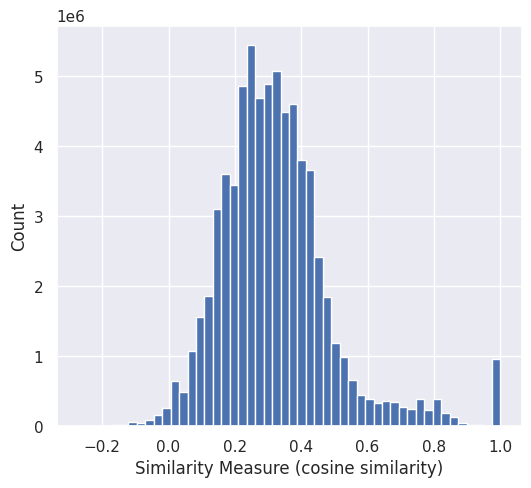

In [48]:
fig, ax = plt.subplots(1,1)
ax.hist(values, bins=50)
ax.set_xlabel(f"Similarity Measure (cosine similarity)")
ax.set_ylabel(f"Count")
plt.show()

In [49]:
values = enc.df['similarities'].values
values = np.vstack(values)
values -= np.identity(values.shape[0])
values = values.flatten()

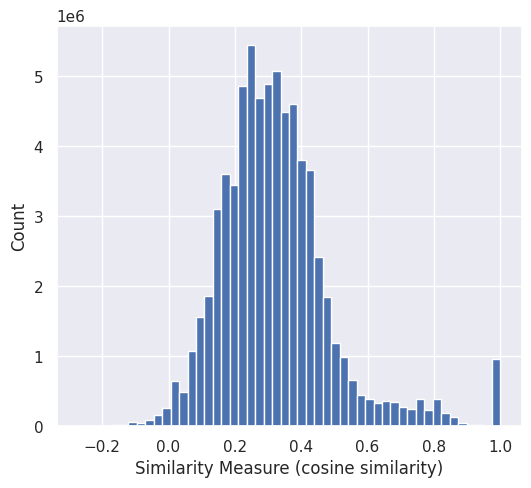

In [50]:
fig, ax = plt.subplots(1,1)
ax.hist(values, bins=50)
ax.set_xlabel(f"Similarity Measure (cosine similarity)")
ax.set_ylabel(f"Count")
plt.show()

In [51]:
values = enc.df['similarities'].values
values = np.vstack(values)
values -= np.identity(values.shape[0])
values = values.flatten()

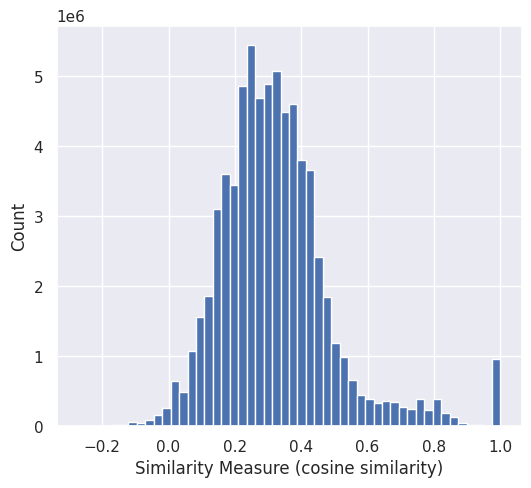

In [52]:
fig, ax = plt.subplots(1,1)
ax.hist(values, bins=50)
ax.set_xlabel(f"Similarity Measure (cosine similarity)")
ax.set_ylabel(f"Count")
plt.show()